In [1]:
# importing the required libraries
import numpy as np 
import pandas as pd
import seaborn as sns  
import numpy as np 
from matplotlib import pyplot as plt   

THE Nan VALUES OF THE BG COLUMN ARE FILLED WITH THE RESPECTIVE DAY'S MEAN_BG

In [2]:
# reading the input file
df = pd.read_csv("C:\\Users\\vvsat\\Documents\\machine learning\\blood glucose challenge\\dataset_0.csv")
print(df.head())  

    TIME  FOOD  RAPI  LAI  BG
0  00:00   NaN   NaN  NaN NaN
1  00:10   NaN   NaN  NaN NaN
2  00:20   NaN   NaN  NaN NaN
3  00:30   NaN   NaN  NaN NaN
4  00:40   NaN   NaN  NaN NaN


In [3]:
# dropping the 'TIME' column
df = df.drop("TIME", axis=1)
df = df.dropna(subset=['BG'])

# VISUALISING THE DATA

In [4]:
# printing the head of the final dataframe
print(df.head())

     FOOD  RAPI  LAI   BG
95    0.0   0.0  0.0  8.3
136   0.0   0.0  0.0  5.8
195   0.0   0.0  0.0  4.9
218   0.0   0.0  0.0  8.6
344   0.0   0.0  0.0  7.5


VISUALISING THE INDEPENDENT RELATIONSHIPS


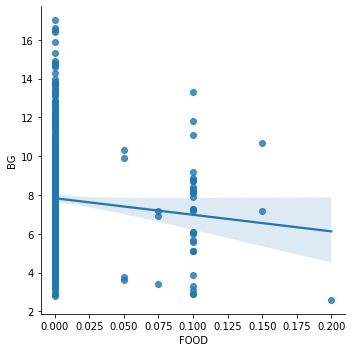

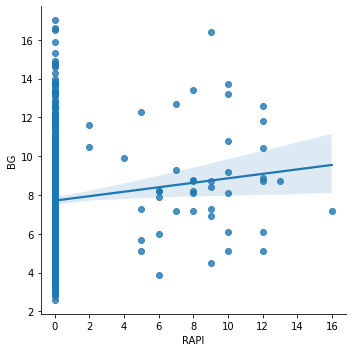

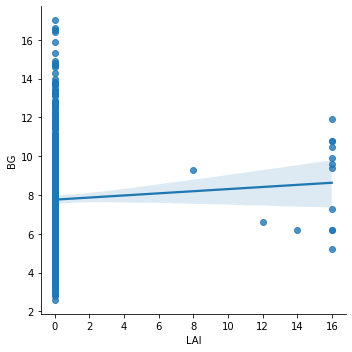

In [5]:
# plotting the data
print("VISUALISING THE INDEPENDENT RELATIONSHIPS")

sns.lmplot(x='FOOD', y='BG', data=df)

sns.lmplot(x='RAPI', y='BG', data=df)  

sns.lmplot(x='LAI', y='BG', data=df)  

          FOOD      RAPI       LAI        BG
FOOD  1.000000  0.553667 -0.039014 -0.080194
RAPI  0.553667  1.000000 -0.011430  0.097594
LAI  -0.039014 -0.011430  1.000000  0.045606
BG   -0.080194  0.097594  0.045606  1.000000


<AxesSubplot:>

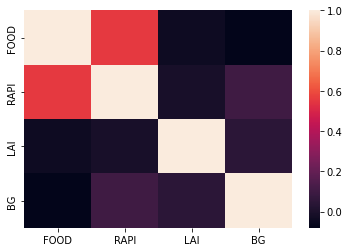

In [6]:
# displaying the correlation between the given features
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [7]:
# understanding the skewness and kurtosis of the data
print("SKEWNESS : \n",df.skew(axis = 0, skipna = True))
print("\n \n KURTOSIS : \n",df.kurtosis(axis = 0, skipna = True))

SKEWNESS : 
 FOOD    3.951434
RAPI    3.995057
LAI     6.579114
BG      0.651681
dtype: float64

 
 KURTOSIS : 
 FOOD    15.554181
RAPI    15.432106
LAI     41.825665
BG       0.254234
dtype: float64


In [8]:
# applying logrithmic transform for BG
# applied only to the targets

print("LOGRITHMIC TRANSFORM IS APPLIED AS THE SKEWNESS OF THE DATA IS HIGH")

df['BG'] = np.reciprocal(df['BG'])

LOGRITHMIC TRANSFORM IS APPLIED AS THE SKEWNESS OF THE DATA IS HIGH


In [9]:
print(df.head())

     FOOD  RAPI  LAI        BG
95    0.0   0.0  0.0  0.120482
136   0.0   0.0  0.0  0.172414
195   0.0   0.0  0.0  0.204082
218   0.0   0.0  0.0  0.116279
344   0.0   0.0  0.0  0.133333


In [10]:
# understanding the skewness and kurtosis of the data

print("AFTER LOG TRANSFORM \n ")
print("SKEWNESS : \n",df.skew(axis = 0, skipna = True))
print("\n \n KURTOSIS : \n",df.kurtosis(axis = 0, skipna = True)) 

AFTER LOG TRANSFORM 
 
SKEWNESS : 
 FOOD    3.951434
RAPI    3.995057
LAI     6.579114
BG      1.268593
dtype: float64

 
 KURTOSIS : 
 FOOD    15.554181
RAPI    15.432106
LAI     41.825665
BG       1.940114
dtype: float64


VISUALISING THE INDEPENDENT RELATIONSHIPS


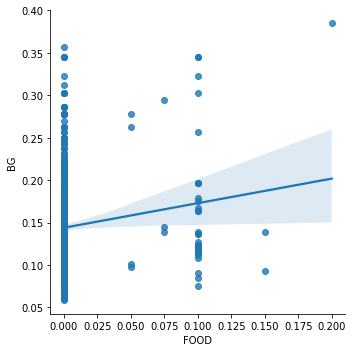

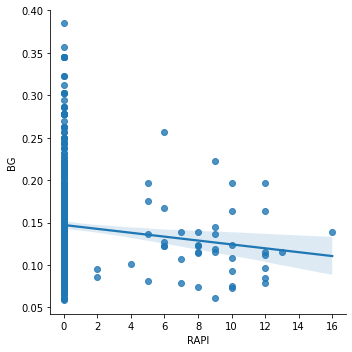

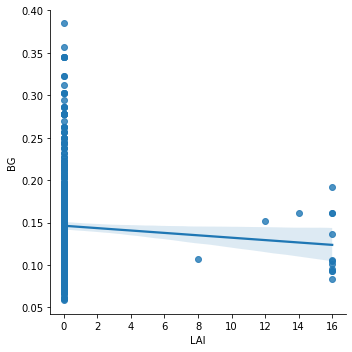

In [11]:
# plotting the data
print("VISUALISING THE INDEPENDENT RELATIONSHIPS")

sns.lmplot(x='FOOD', y='BG', data=df)

sns.lmplot(x='RAPI', y='BG', data=df)  

sns.lmplot(x='LAI', y='BG', data=df)  

          FOOD      RAPI       LAI        BG
FOOD  1.000000  0.553667 -0.039014  0.132277
RAPI  0.553667  1.000000 -0.011430 -0.094608
LAI  -0.039014 -0.011430  1.000000 -0.057482
BG    0.132277 -0.094608 -0.057482  1.000000


<AxesSubplot:>

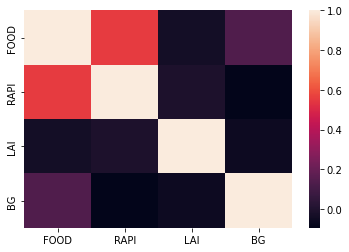

In [12]:
# displaying the correlation between the given features
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [13]:
# food, rapi and lai - independent variables
x_df = df[['FOOD', 'RAPI', 'LAI']]

# BG - dependent/predictor variable 
y_df = df['BG'] 

x_df = x_df.to_numpy()
y_df = y_df.to_numpy()

In [14]:
# splitting the data into train and test(20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=42)

In [15]:
from sklearn.compose import make_column_selector

# numerical column selector
num_selector = make_column_selector(dtype_include=np.number)  

print('numerical columns = ', num_selector(df)) 

numerical columns =  ['FOOD', 'RAPI', 'LAI', 'BG']


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# preprocessing steps - Scaling and Imputing the NaN values
num_linear_processor = make_pipeline(
    SimpleImputer(strategy='constant', add_indicator=True), StandardScaler()
)

num_linear_processor 

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(add_indicator=True, strategy='constant')),
                ('standardscaler', StandardScaler())])

# POLYNOMIAL REGRESSION

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Histogram-based Gradient Boosting Regression Tree
poly_pipeline = make_pipeline(
    num_linear_processor, PolynomialFeatures(5), Ridge(alpha=1e-3)
)
poly_pipeline 

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(add_indicator=True,
                                                strategy='constant')),
                                 ('standardscaler', StandardScaler())])),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('ridge', Ridge(alpha=0.001))])

In [18]:
# fitting the model
poly_pipeline.fit(X_train,y_train)
print('R^2 value =', poly_pipeline.score(X_train, y_train))  #Printing the R^2 value 

# testing the model 
prediction_test = poly_pipeline.predict(X_test) 
print(y_test) 
print(prediction_test) 
print("Mean square error =", np.mean(prediction_test-y_test)**2)  

R^2 value = 0.11433443232858187
[0.10638298 0.12658228 0.11235955 0.14705882 0.0990099  0.15384615
 0.0862069  0.20408163 0.14705882 0.2173913  0.12195122 0.17857143
 0.07575758 0.11764706 0.07518797 0.14492754 0.24390244 0.08474576
 0.11363636 0.12195122 0.1        0.16393443 0.11627907 0.12345679
 0.14084507 0.16129032 0.17857143 0.22222222 0.12345679 0.13513514
 0.11494253 0.09259259 0.10989011 0.12658228 0.09433962 0.19230769
 0.17857143 0.07518797 0.10989011 0.25       0.07936508 0.19230769
 0.1369863  0.16666667 0.12195122 0.22222222 0.11904762 0.12658228
 0.16666667 0.19230769 0.11904762 0.17857143 0.0990099  0.25641026
 0.16129032 0.05882353 0.21276596 0.15151515 0.12048193 0.13157895
 0.08196721 0.125      0.16129032 0.09433962 0.11494253 0.27777778
 0.2173913  0.10526316 0.1754386  0.13157895 0.14925373 0.10989011
 0.12658228 0.07936508 0.14705882 0.17241379 0.14705882 0.14705882
 0.10869565 0.27777778 0.06289308 0.12987013 0.12820513 0.11904762
 0.06849315 0.10638298 0.125  

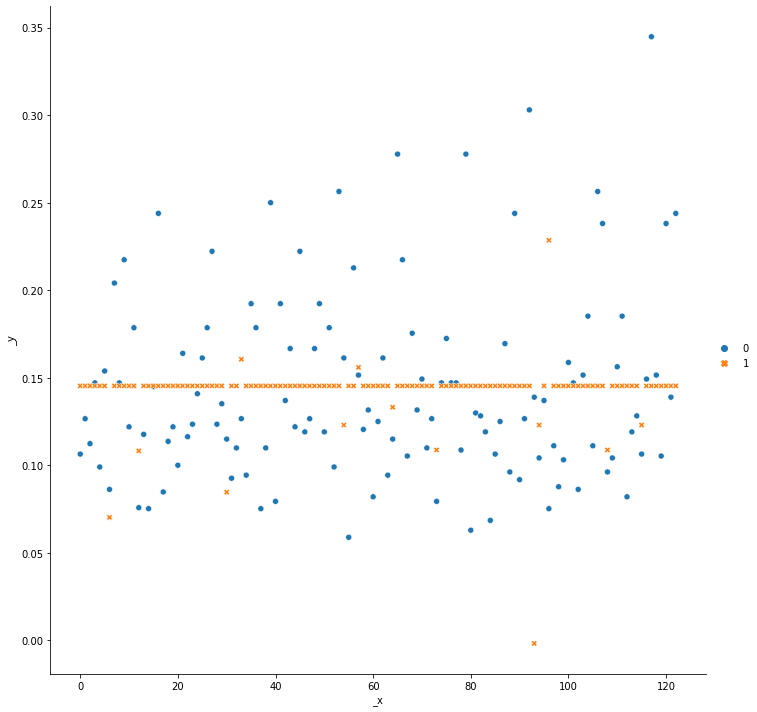

In [19]:
# plotting the results
sns.relplot(data=[y_test,prediction_test], height=10, aspect=1);  

# PREDICTION

In [19]:
# load the model from disk
import pickle
loaded_model = pickle.load(open('lasso_cv.pkl', 'rb'))

In [20]:
# reading the input file
df2 = pd.read_csv("C:\\Users\\vvsat\\Documents\\machine learning\\blood glucose challenge\\bg.csv")
print(df2.head())  

         BG
0  6.868342
1  6.868342
2  6.868342
3  6.868342
4  6.868342


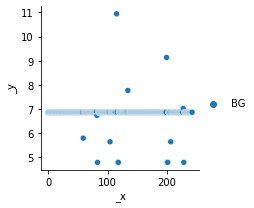

In [24]:
# plotting the results
sns.relplot(data=df2, height=3, aspect=1);  

In [17]:
# dropping the 'TIME' column
df2 = df2.drop("TIME", axis=1)
df2 = df2.drop("BG", axis=1)

In [18]:
df2.head()

,FOOD,RAPI,LAI
0,0.0,0,0
1,0.0,0,0
2,0.0,0,0
3,0.0,0,0
4,0.0,0,0


In [19]:
# food, rapi and lai - independent variables
x_df2 = df2[['FOOD', 'RAPI', 'LAI']]
x_df2 = x_df2.to_numpy()

In [20]:
from sklearn.impute import SimpleImputer
# imputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=True)
imputer.fit(x_df2)
x = imputer.transform(x_df2)

In [21]:
prediction_test = loaded_model.predict(x) 
prediction_test = np.reciprocal(prediction_test)
print((prediction_test).reshape(-1,1))      

[[ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 5.79673079]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834233]
 [ 6.86834

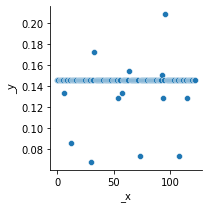

In [26]:
# plotting the results
sns.relplot(data=prediction_test, height=3, aspect=1);  

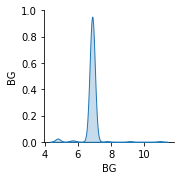

In [29]:
# plotting the gaussian distribution of the data

sns.pairplot(df2, diag_kind='kde')

<AxesSubplot:>

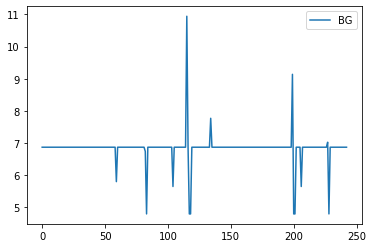

In [32]:
df2.plot()